# CARGA DE DATOS

__TODO__

In [1]:
from Utils import DatasetProcess, reconstruction_plot
from ConvModel import ConvModel
from AutoEncoder import TwoStepAutoEncoder, TwoStepClassifier, TwoStepTraining, OneStepAutoencoder, OneStepTraining
from OneClass import AnomalyDetector
from Contrastive import ContrastiveModel

2025-04-03 18:20:03.885599: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743697203.896861  173437 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743697203.900318  173437 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743697203.909436  173437 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743697203.909446  173437 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743697203.909447  173437 computation_placer.cc:177] computation placer alr

In [2]:
(x_train, y_train), (x_test, y_test) = DatasetProcess.load()


# Aplicar la función hold_out
(x_train_no_labeled, x_train_labeled, y_train_labeled), (x_val, y_val), (x_test, y_test) = DatasetProcess.hold_out(
    (x_train, y_train), (x_test, y_test), validation_size=1000
)

x_train_labeled = x_train_labeled.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Verificar las dimensiones
print(f"Datos no etiquetados: {x_train_no_labeled.shape}")
print(f"Datos etiquetados entrenamiento: {x_train_labeled.shape}")
print(f"Etiquetas entrenamiento: {y_train_labeled.shape}")
print(f"Datos validación: {x_val.shape}")
print(f"Etiquetas validación: {y_val.shape}")
print(f"Datos prueba: {x_test.shape}")
print(f"Etiquetas prueba: {y_test.shape}")

Datos no etiquetados: (40000, 32, 32, 3)
Datos etiquetados entrenamiento: (9000, 32, 32, 3)
Etiquetas entrenamiento: (9000, 1)
Datos validación: (1000, 32, 32, 3)
Etiquetas validación: (1000, 1)
Datos prueba: (10000, 32, 32, 3)
Etiquetas prueba: (10000, 1)


# EJERCICIO 1

Entrena un modelo, creado sobre TensorFlow, haciendo uso únicamente de las instancias etiquetadas de entrenamiento. Dicho modelo debe de tener al menos cuatro capas densas y/o convolucionales.

Responde a las siguientes preguntas:

1. ¿Qué red has escogido? ¿Por qué? ¿Cómo la has entrenado?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Qué conclusiones sacas de los resultados detallados en el punto anterior?

In [3]:
model_base = ConvModel()
history_base = model_base.fit(
    x_train_labeled, 
    y_train_labeled,
    validation_data=(x_val, y_val),
    batch_size=128,
    epochs=100
)

/home/clown/2-semester/3year2sem/maai/maai_env/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1743697208.348911  173437 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1048 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:06:00.0, compute capability: 8.6
/home/clown/2-semester/3year2sem/maai/maai_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


E0000 00:00:1743697213.336988  173437 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1743697214.752335  173551 cuda_dnn.cc:529] Loaded cuDNN version 90501
2025-04-03 18:20:15.420368: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 560.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-04-03 18:20:15.712225: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 578.25MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - accuracy: 0.0307 - loss: 9.5825 - val_accuracy: 0.0170 - val_loss: 9.0462
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.0628 - loss: 8.4329 - val_accuracy: 0.0200 - val_loss: 8.4275
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.0791 - loss: 7.5430 - val_accuracy: 0.0140 - val_loss: 8.1591
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.0886 - loss: 6.7756 - val_accuracy: 0.0180 - val_loss: 7.4347
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.1068 - loss: 6.1941 - val_accuracy: 0.0130 - val_loss: 7.5352
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.1191 - loss: 5.7589 - val_accuracy: 0.0130 - val_loss: 7.0260
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.1307 - loss: 5.3771 - val_accuracy: 0.0350 - val_loss: 5.8975
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.1368 - loss: 5.1479 - val_accuracy: 0.0800 - val_

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3070 - loss: 3.4876
Accuracy en conjunto de prueba: 0.30799999833106995


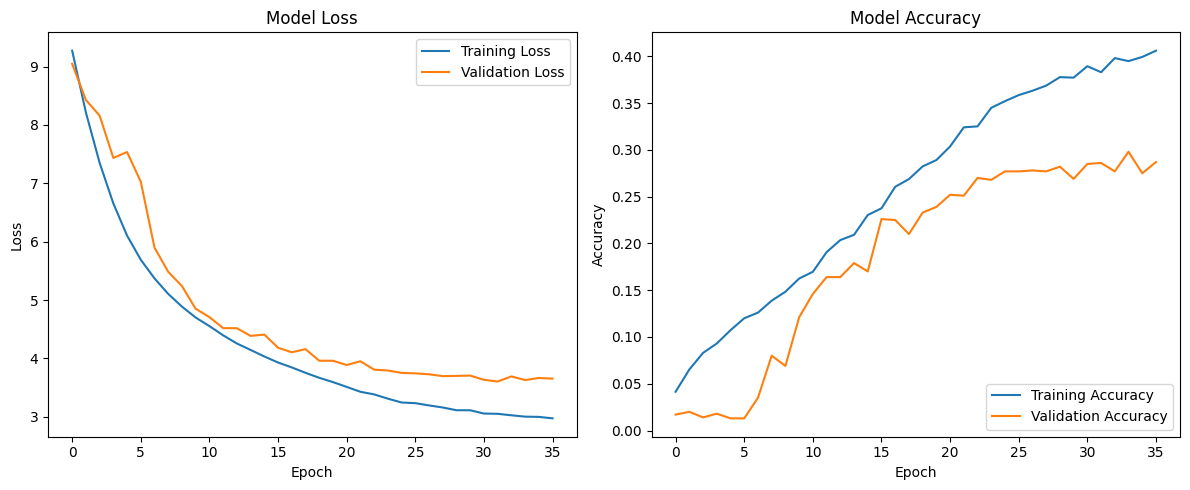

In [4]:
# Evalúa con el conjunto de prueba
test_accuracy = model_base.score(x_test, y_test)
print(f"Accuracy en conjunto de prueba: {test_accuracy}")

model_base.plot(history_base)

# EJERCICIO 2

Entrena el mismo modelo, incorporando las instancias no etiquetadas de entrenamiento mediante la técnica de auto-aprendizaje. Opcionalmente, se ponderará cada instancia de entrada en función de su calidad (o certeza).

Responde a las siguientes preguntas:
1. ¿Qué parámetros has definido para el entrenamiento?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Se mejoran los resultados obtenidos en el Ejercicio 1?
4. ¿Qué conclusiones sacas de los resultados detallados en los puntos anteriores?

Epoch 1/100


E0000 00:00:1743697381.132017  173437 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1_1/dropout_5_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.0325 - loss: 17.2825 - val_accuracy: 0.0170 - val_loss: 11.7677
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.0635 - loss: 14.3628 - val_accuracy: 0.0120 - val_loss: 9.9357
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.0744 - loss: 12.3342 - val_accuracy: 0.0160 - val_loss: 8.2988
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.0890 - loss: 11.0690 - val_accuracy: 0.0400 - val_loss: 7.0876
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.1071 - loss: 10.3264 - val_accuracy: 0.1040 - val_loss: 6.3123
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.1242 - loss: 9.7800 - val_accuracy: 0.0880 - val_loss: 6.0385
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.1307 - loss: 9.3733 - val_accuracy: 0.1120 - val_loss: 5.7161
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.1427 - loss: 8.9590 - val_a

E0000 00:00:1743697657.383750  173437 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_2_1/dropout_10_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


176/176 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.0721 - loss: 15.8354 - val_accuracy: 0.0080 - val_loss: 11.2022
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.1364 - loss: 12.2489 - val_accuracy: 0.0220 - val_loss: 8.9263
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.1562 - loss: 10.2823 - val_accuracy: 0.0670 - val_loss: 6.9563
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.1829 - loss: 9.2688 - val_accuracy: 0.0850 - val_loss: 6.2530
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.2207 - loss: 8.5198 - val_accuracy: 0.0790 - val_loss: 6.0242
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.2504 - loss: 8.0029 - val_accuracy: 0.1270 - val_loss: 5.4927
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.2750 - loss: 7.6133 - val_accuracy: 0.1410 - val_loss: 5.3123
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.2994 - loss: 7.2045 - val_acc

E0000 00:00:1743698055.312849  173437 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


215/215 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.0847 - loss: 14.8401 - val_accuracy: 0.0120 - val_loss: 10.1504
Epoch 2/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.1726 - loss: 10.9259 - val_accuracy: 0.0150 - val_loss: 8.4780
Epoch 3/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.2263 - loss: 8.9439 - val_accuracy: 0.0870 - val_loss: 6.5118
Epoch 4/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.2630 - loss: 7.8837 - val_accuracy: 0.1040 - val_loss: 5.8766
Epoch 5/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.3051 - loss: 7.2332 - val_accuracy: 0.1600 - val_loss: 5.3716
Epoch 6/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.3320 - loss: 6.7993 - val_accuracy: 0.1700 - val_loss: 5.2694
Epoch 7/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.3786 - loss: 6.3598 - val_accuracy: 0.1860 - val_loss: 5.0429
Epoch 8/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.4075 - loss: 6.0806 - val_accu

E0000 00:00:1743698423.398569  173437 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


239/239 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.0961 - loss: 14.1881 - val_accuracy: 0.0180 - val_loss: 9.8958
Epoch 2/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.1997 - loss: 9.9437 - val_accuracy: 0.0270 - val_loss: 7.7872
Epoch 3/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.2480 - loss: 8.1292 - val_accuracy: 0.1060 - val_loss: 6.1052
Epoch 4/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.3064 - loss: 7.1610 - val_accuracy: 0.1400 - val_loss: 5.6240
Epoch 5/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.3496 - loss: 6.5623 - val_accuracy: 0.1660 - val_loss: 5.1777
Epoch 6/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.3950 - loss: 6.1119 - val_accuracy: 0.1820 - val_loss: 5.0640
Epoch 7/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.4321 - loss: 5.7315 - val_accuracy: 0.1830 - val_loss: 4.9369
Epoch 8/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.4493 - loss: 5.5170 - val_accura

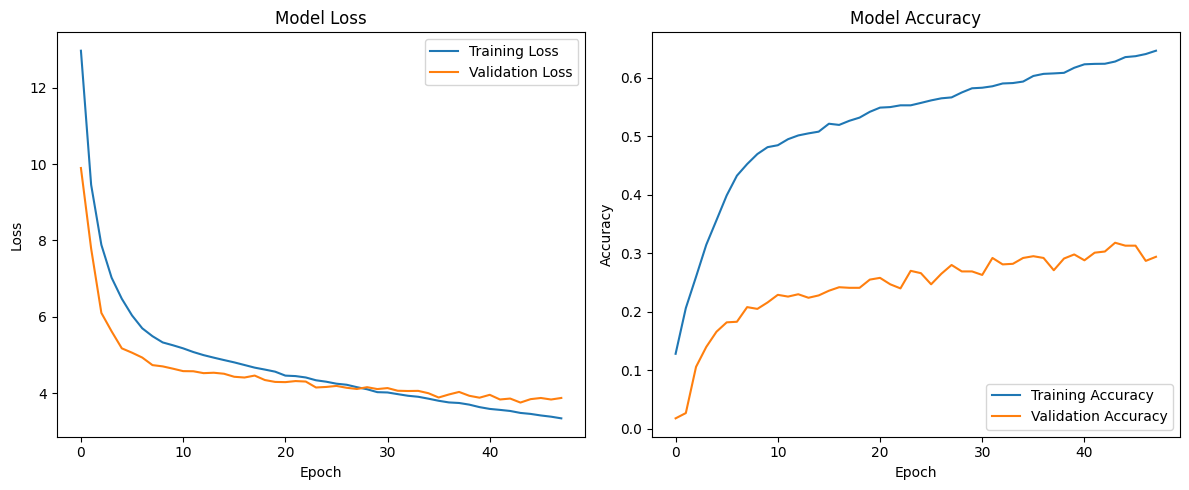

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3441 - loss: 3.5963
Accuracy del modelo final con self-training: 0.3411000072956085
Mejora respecto al modelo base: 0.0331


In [5]:
# Función para crear modelos consistentes durante self-training
def create_model():
    return ConvModel(
        learning_rate=0.0005,  # Learning rate reducido para fine-tuning
        dropout_prob=0.25,     
        l2_lambda=0.005        
    )

# Normalizar datos no etiquetados
x_train_no_labeled = x_train_no_labeled.astype('float32') / 255.0

# Aplica self-training con datos no etiquetados
final_model = ConvModel.self_training_v2(
    model_func=create_model,
    x_train=x_train_labeled,
    y_train=y_train_labeled,  
    unlabeled_data=x_train_no_labeled,
    validation_data=(x_val, y_val),
    thresh=0.85,             
    train_epochs=4,
    verbose=1
)

# Evalúa el modelo final
final_accuracy = final_model.score(x_test, y_test)
print(f"Accuracy del modelo final con self-training: {final_accuracy}")
print(f"Mejora respecto al modelo base: {final_accuracy - test_accuracy:.4f}")